In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    StackingClassifier
)

from sklearn.naive_bayes import GaussianNB
from xgboost  import XGBClassifier

In [154]:
df = pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [156]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


for this dataset all features mean & median values are very close (close to equal). there is no significant difference between these values so I can say that there is no heavy skewness in this dataset, so I can fill the missing values by using their mean vlaue.

In [158]:
missing_cols = ['ph', 'Sulfate', 'Trihalomethanes']

for col in missing_cols:
    # filling missing values for Potability = 0
    mean_potability_0 = df[df['Potability'] == 0][col].mean()
    df.loc[(df['Potability'] == 0) & (df[col].isna()), col] = mean_potability_0

    # filling missing values for Potability = 1
    mean_potability_1 = df[df['Potability'] == 1][col].mean()
    df.loc[(df['Potability'] == 1) & (df[col].isna()), col] = mean_potability_1

In [159]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [160]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


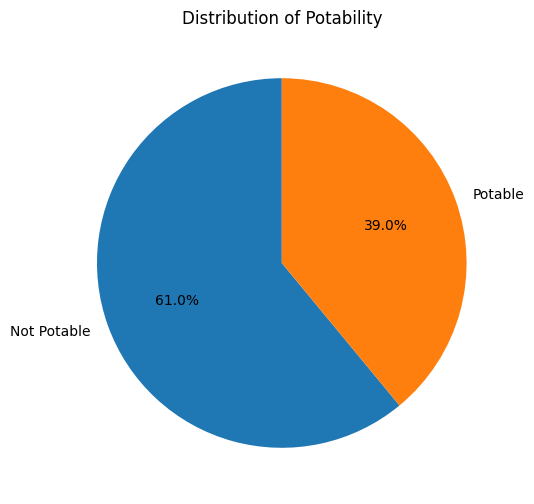

In [161]:
plt.figure(figsize=(8, 6))
plt.pie(df['Potability'].value_counts(), labels=['Not Potable', 'Potable'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability')
plt.show()

In [162]:
# Since this dataset doesn't have any categorical cols so no encoding needed here

In [163]:
def check_outliers(feature):
  q1_feature = feature.quantile(0.25)
  q3_feature = feature.quantile(0.75)

  iqr = q3_feature - q1_feature

  lower_bound = q1_feature - 1.5 * iqr
  upper_bound = q3_feature + 1.5 * iqr

  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]

  print(f"Number of outliers for {feature.name}: {len(outliers)}")
  print(outliers)

  print(f"\n {'--' * 40} \n")

  sns.boxplot(feature)
  plt.title(feature.name)
  plt.show()

  print(f"\n {'--' * 40} \n")


In [164]:
all_features = df.columns.tolist()
all_features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [165]:
all_features.remove('Potability')
print(all_features)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


Number of outliers for ph: 142
1        3.716080
9       11.180284
26       3.445062
32      10.433291
36       3.641630
          ...    
3233    10.485604
3246    10.667364
3249    10.808157
3261     3.629922
3269    11.491011
Name: ph, Length: 142, dtype: float64

 -------------------------------------------------------------------------------- 



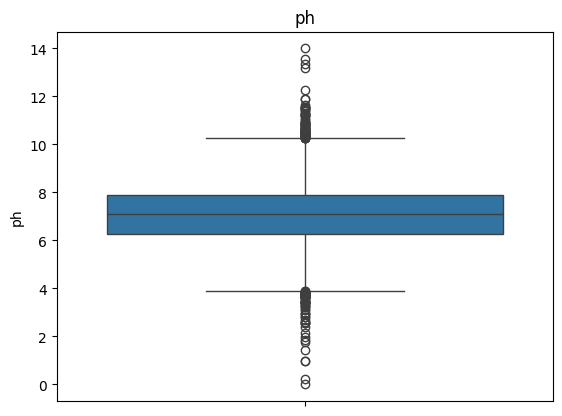


 -------------------------------------------------------------------------------- 

Number of outliers for Hardness: 83
18      279.357167
37      304.235912
51      100.457615
67      103.464759
71      116.299330
           ...    
3218    287.975540
3221    303.702627
3230    114.807578
3244    277.065713
3269     94.812545
Name: Hardness, Length: 83, dtype: float64

 -------------------------------------------------------------------------------- 



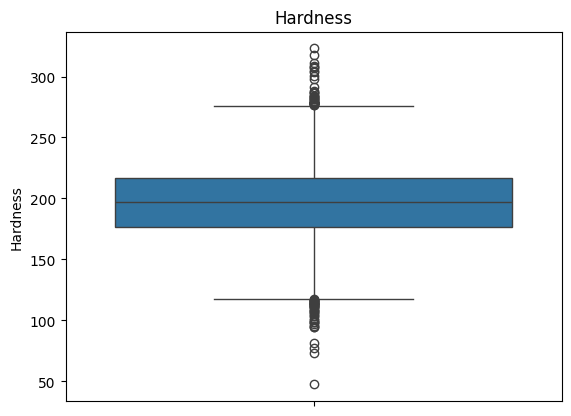


 -------------------------------------------------------------------------------- 

Number of outliers for Solids: 47
142     46140.126850
186     45222.506665
283     48621.563952
287     46113.957485
366     52318.917298
378     45249.449033
405     46931.884293
516     45510.584319
546     49074.730407
613     44868.458368
666     52060.226800
987     48002.084596
1031    56867.859236
1068    55334.702799
1077    48410.471014
1096    45141.686036
1186    56351.396304
1302    44896.984112
1332    45166.912141
1343    48204.172192
1445    45166.639389
1462    45939.689158
1527    46718.555965
1554    56488.672413
1556    45243.028953
1746    49125.360084
1784    50279.262429
1815    45041.149139
1858    46077.358485
1955    49009.924656
1984    47022.745845
2012    47852.888871
2497    49341.421279
2602    61227.196008
2680    48175.852093
2758    47591.283183
2891    45050.002276
2993    45148.808118
3014    49456.587108
3062    44982.734155
3130    50793.898917
3150    56320.586979

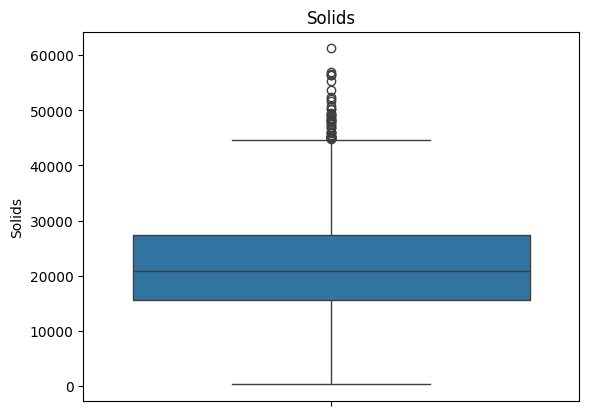


 -------------------------------------------------------------------------------- 

Number of outliers for Chloramines: 61
272     12.580026
275     13.043806
285      0.530351
287     12.912187
304     12.363285
          ...    
2677     2.562255
2694    12.653362
2699    11.996015
2714     2.648390
2796     3.016033
Name: Chloramines, Length: 61, dtype: float64

 -------------------------------------------------------------------------------- 



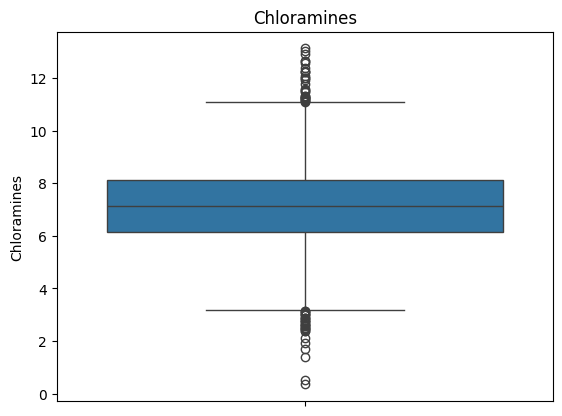


 -------------------------------------------------------------------------------- 

Number of outliers for Sulfate: 264
9       404.041635
51      247.200826
84      266.908428
112     426.543590
118     241.607532
           ...    
3115    407.417977
3116    413.914001
3162    254.040977
3176    264.052839
3269    258.930600
Name: Sulfate, Length: 264, dtype: float64

 -------------------------------------------------------------------------------- 



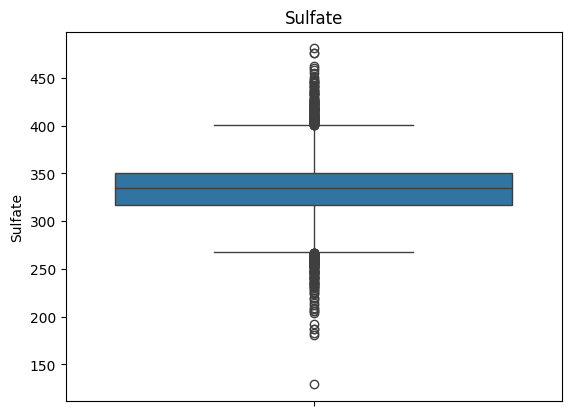


 -------------------------------------------------------------------------------- 

Number of outliers for Conductivity: 11
66      669.725086
140     672.556999
342     695.369528
1183    656.924128
1269    660.254946
1295    666.690618
1384    181.483754
2134    708.226364
2704    753.342620
2737    657.570422
3142    674.443476
Name: Conductivity, dtype: float64

 -------------------------------------------------------------------------------- 



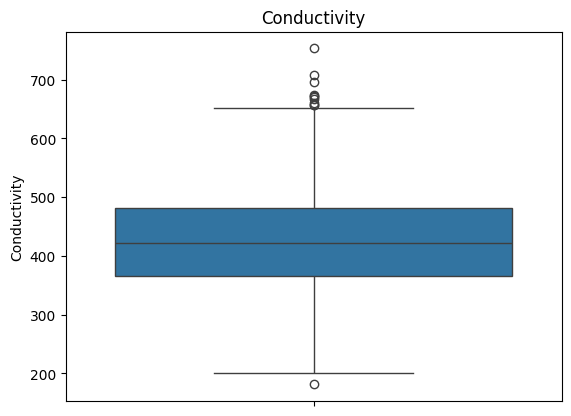


 -------------------------------------------------------------------------------- 

Number of outliers for Organic_carbon: 25
43      23.917601
227     23.399516
333      5.315287
420     23.373265
558     23.514774
698     23.569645
785      2.200000
876      4.966862
1055    23.952450
1390     4.371899
1447     4.861631
1536     5.218233
1663     4.473092
1689     5.051695
1792    28.300000
1827    23.317699
2057    24.755392
2082     5.188466
2138     4.902888
2224     4.466772
2236    27.006707
2414     5.196717
2601    23.667667
2680     5.159380
3169    23.604298
Name: Organic_carbon, dtype: float64

 -------------------------------------------------------------------------------- 



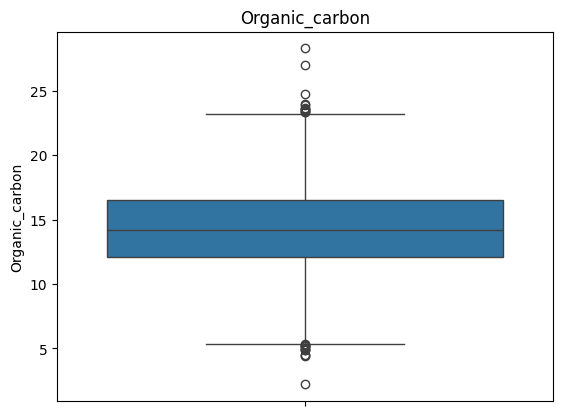


 -------------------------------------------------------------------------------- 

Number of outliers for Trihalomethanes: 54
61       17.915723
128     110.739299
133      23.817020
204      25.525267
245      18.400012
284     107.754043
330       8.175876
350     112.622733
356     107.189584
374      20.337753
377      26.505484
518      23.792950
531     120.030077
630      25.057375
698      19.175175
719      21.355275
951      18.101222
1038    107.900842
1041     23.136611
1053    107.282329
1075     17.000683
1081    108.849568
1123      8.577013
1156    116.161622
1157    118.357275
1316    114.208671
1337     26.140863
1360     16.291505
1630     17.527765
1699     22.749735
1767     22.219327
1864    108.589414
1876    110.431080
1893    107.610806
1962    113.048886
2006     24.532773
2077    107.585967
2099    112.061027
2121     15.684877
2256    112.412210
2353     18.015272
2376    124.000000
2402     24.914971
2490     25.061904
2585     24.734227
2689    108.26522

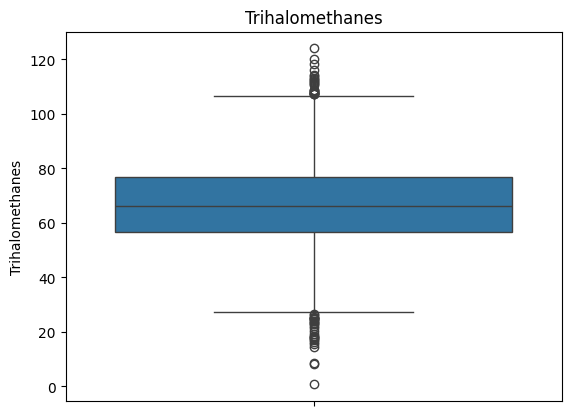


 -------------------------------------------------------------------------------- 

Number of outliers for Turbidity: 19
119     6.204846
382     6.494249
492     6.739000
593     1.680554
789     1.812529
990     6.357439
1073    6.389161
1290    1.496101
1682    1.687625
1892    1.492207
1927    1.659799
2377    6.226580
2554    6.099632
2724    1.641515
2757    6.307678
2796    1.844372
2921    6.494749
3042    1.450000
3166    1.801327
Name: Turbidity, dtype: float64

 -------------------------------------------------------------------------------- 



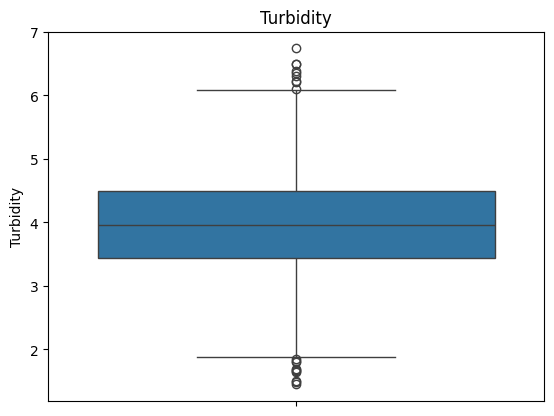


 -------------------------------------------------------------------------------- 



In [166]:
for feature in all_features:
  check_outliers(df[feature])

# Handle Outliers

In [167]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    capped_series = np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))
    return pd.Series(capped_series, index=series.index)


In [168]:
for feature in all_features:
  df[feature] = cap_outliers_iqr(df[feature])

Number of outliers for ph: 0
Series([], Name: ph, dtype: float64)

 -------------------------------------------------------------------------------- 



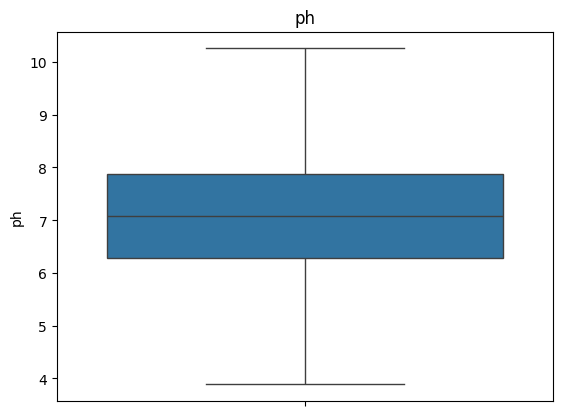


 -------------------------------------------------------------------------------- 

Number of outliers for Hardness: 0
Series([], Name: Hardness, dtype: float64)

 -------------------------------------------------------------------------------- 



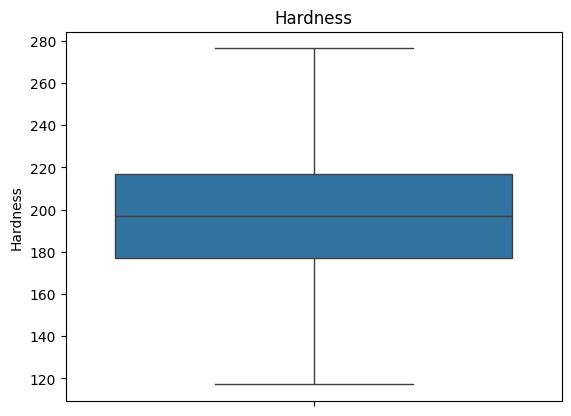


 -------------------------------------------------------------------------------- 

Number of outliers for Solids: 0
Series([], Name: Solids, dtype: float64)

 -------------------------------------------------------------------------------- 



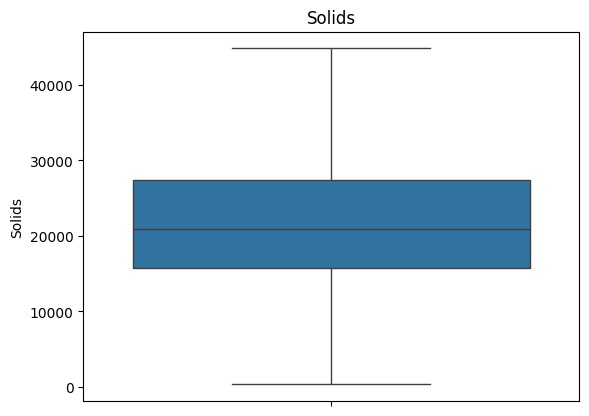


 -------------------------------------------------------------------------------- 

Number of outliers for Chloramines: 0
Series([], Name: Chloramines, dtype: float64)

 -------------------------------------------------------------------------------- 



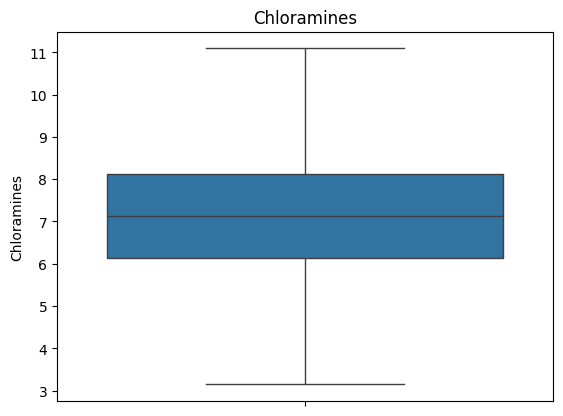


 -------------------------------------------------------------------------------- 

Number of outliers for Sulfate: 0
Series([], Name: Sulfate, dtype: float64)

 -------------------------------------------------------------------------------- 



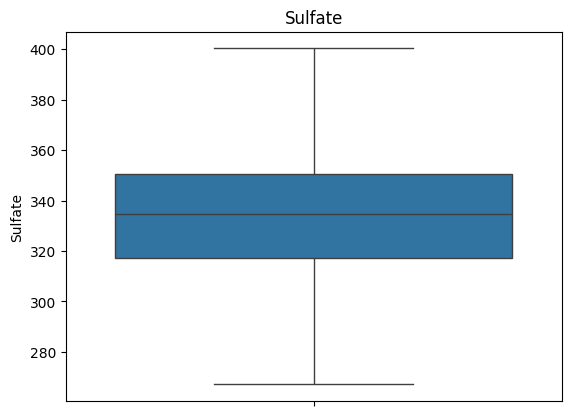


 -------------------------------------------------------------------------------- 

Number of outliers for Conductivity: 0
Series([], Name: Conductivity, dtype: float64)

 -------------------------------------------------------------------------------- 



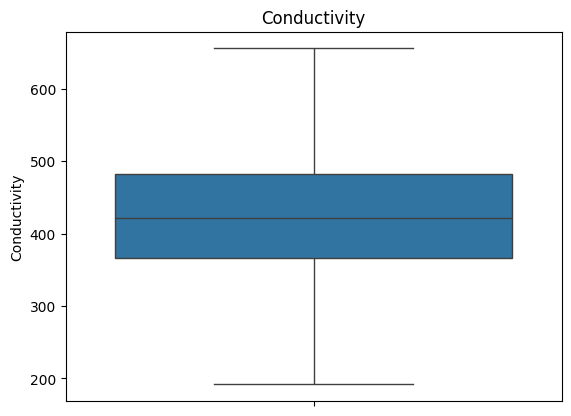


 -------------------------------------------------------------------------------- 

Number of outliers for Organic_carbon: 0
Series([], Name: Organic_carbon, dtype: float64)

 -------------------------------------------------------------------------------- 



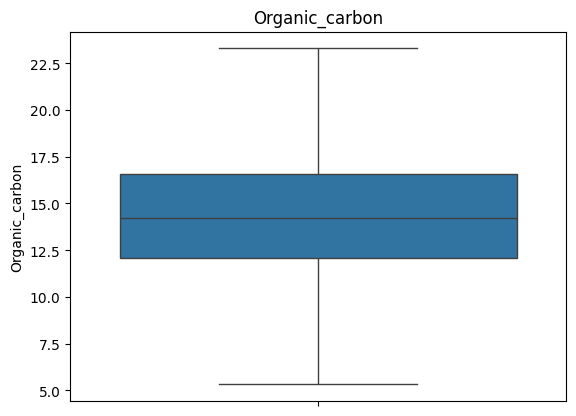


 -------------------------------------------------------------------------------- 

Number of outliers for Trihalomethanes: 0
Series([], Name: Trihalomethanes, dtype: float64)

 -------------------------------------------------------------------------------- 



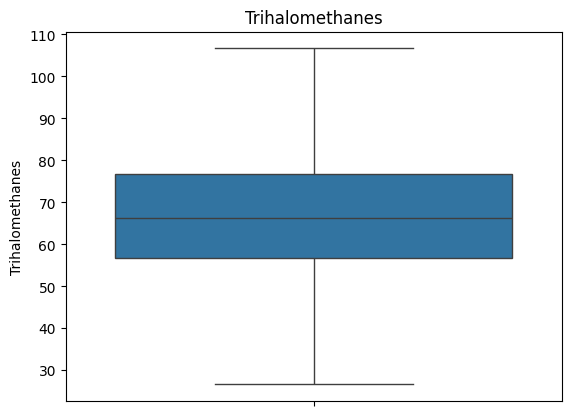


 -------------------------------------------------------------------------------- 

Number of outliers for Turbidity: 0
Series([], Name: Turbidity, dtype: float64)

 -------------------------------------------------------------------------------- 



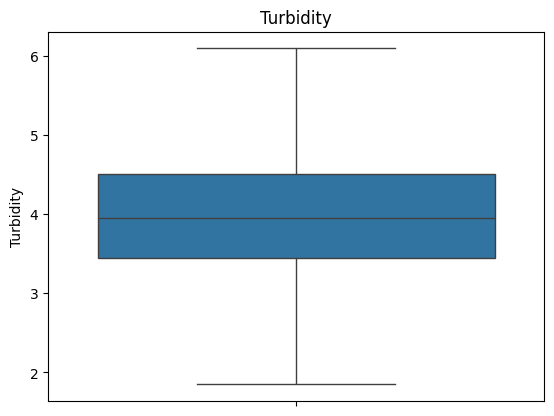


 -------------------------------------------------------------------------------- 



In [169]:
for feature in all_features:
  check_outliers(df[feature])

All outliers handled one by one so outliers available

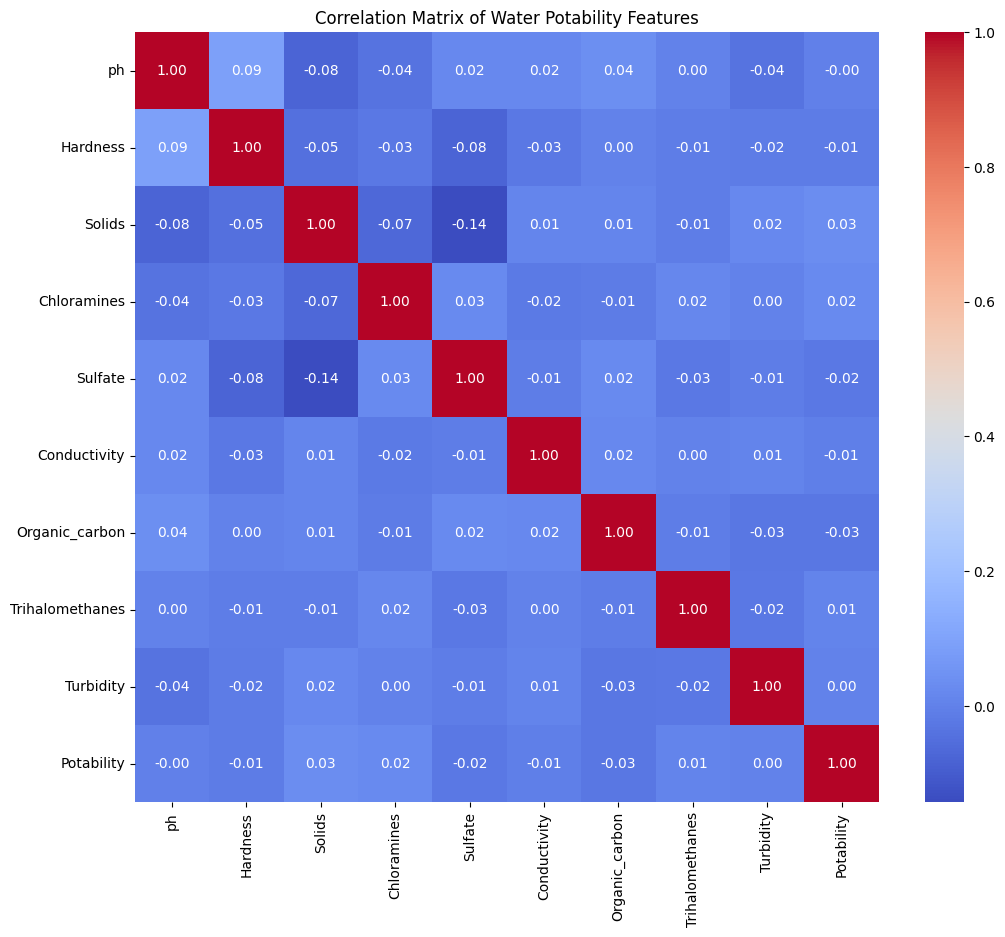

In [170]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Water Potability Features')
plt.show()

based on this heatmap values I can say that there is no strong relationship between any feature with target column.

# Feature Distributions by Potability

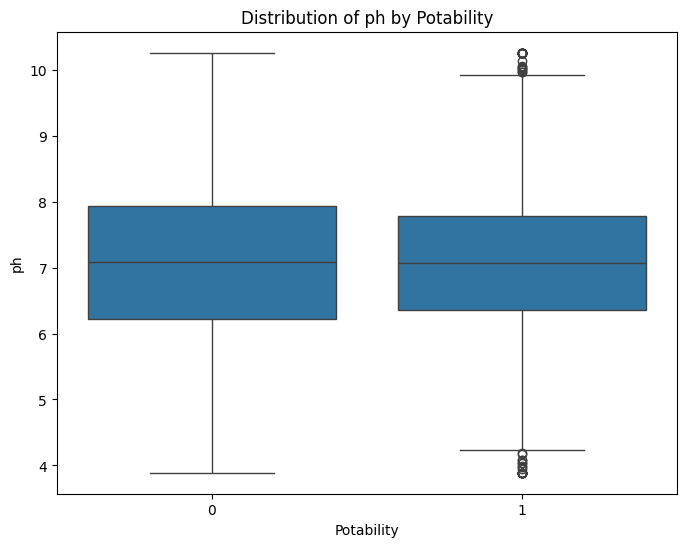

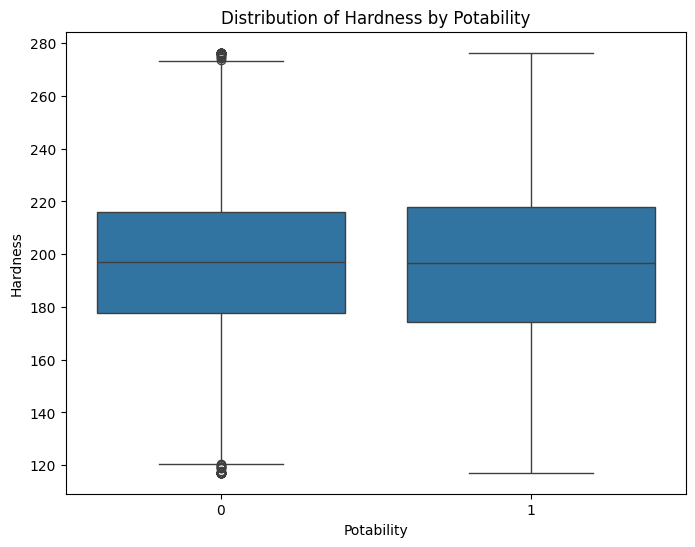

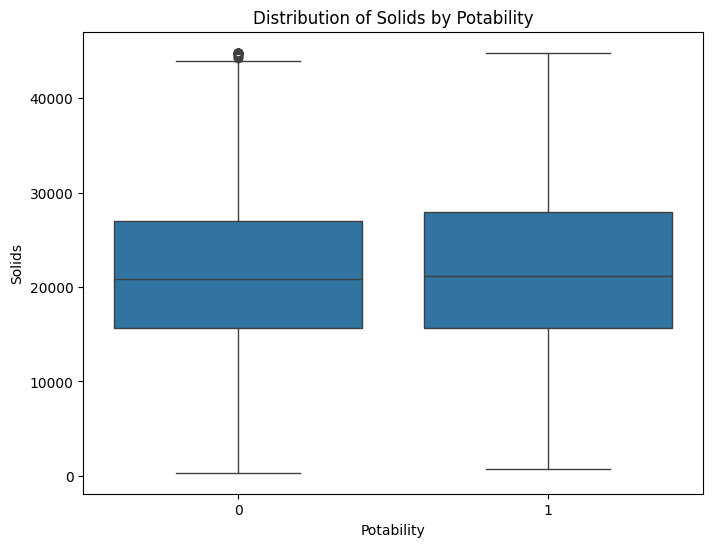

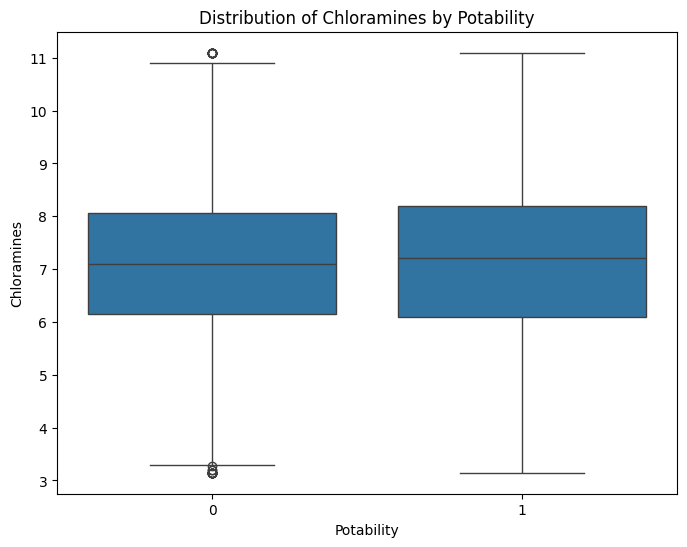

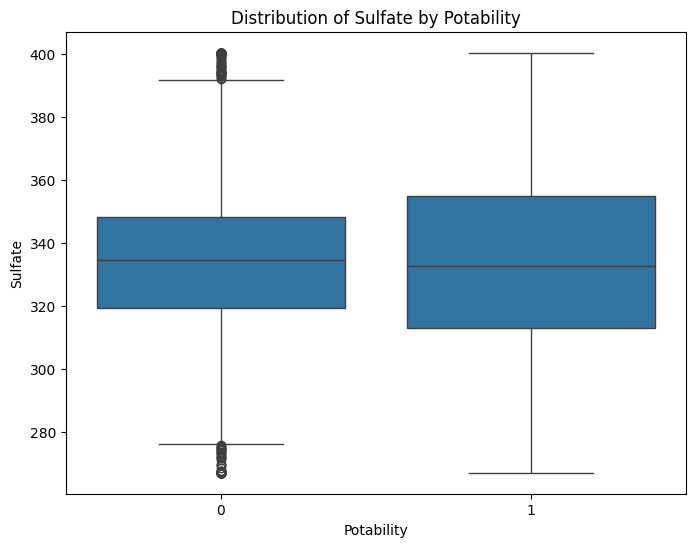

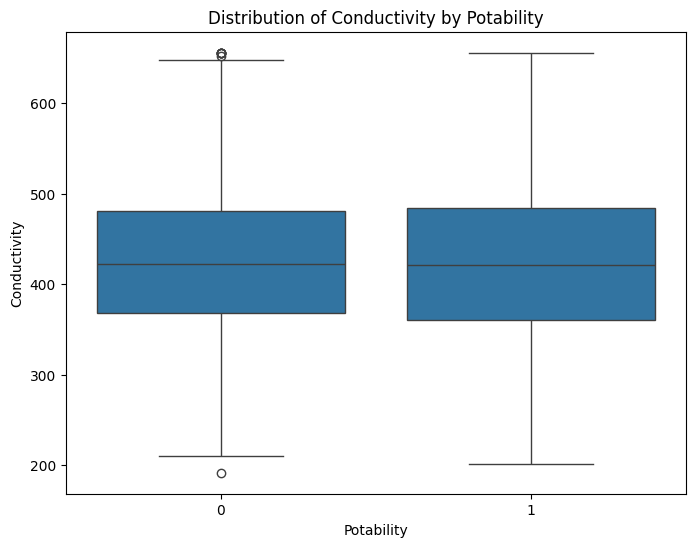

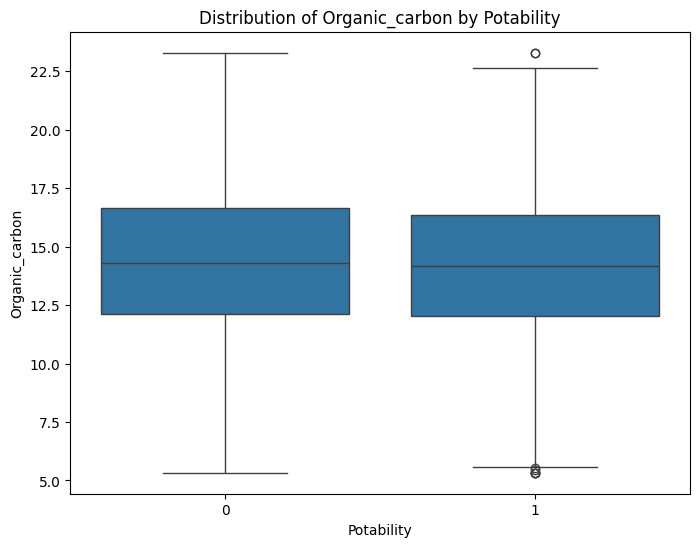

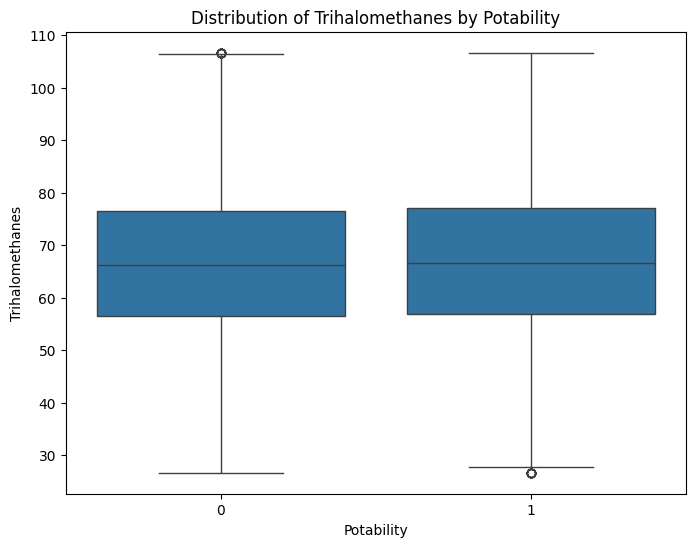

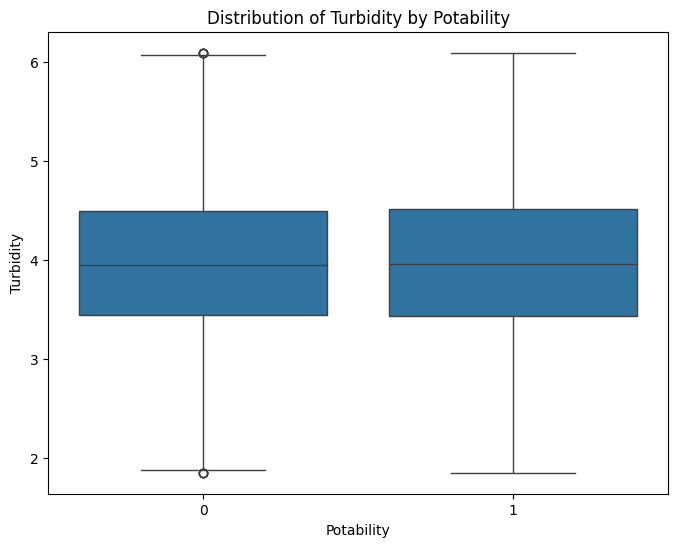

In [171]:
for feature in all_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Potability')
    plt.xlabel('Potability')
    plt.ylabel(feature)
    plt.show()

from this box plot comparison for all_features with target column it shows that all features data points median value for potability 0 and 1 are exactly the same. so there is no noticable distinction between median points for all features with target column.

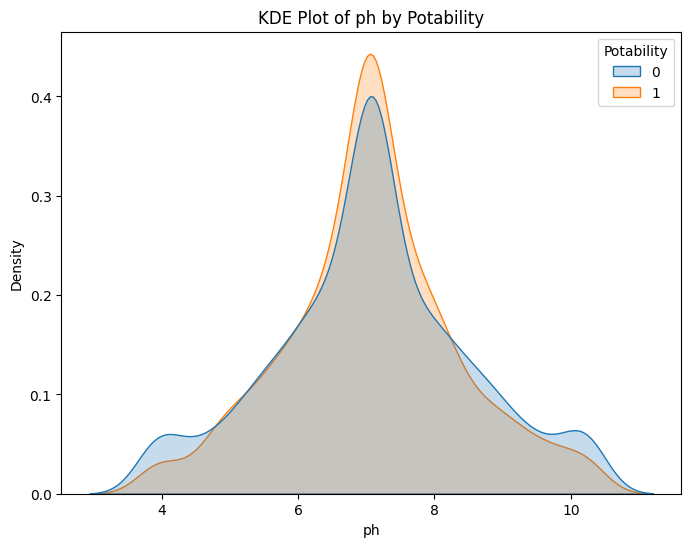

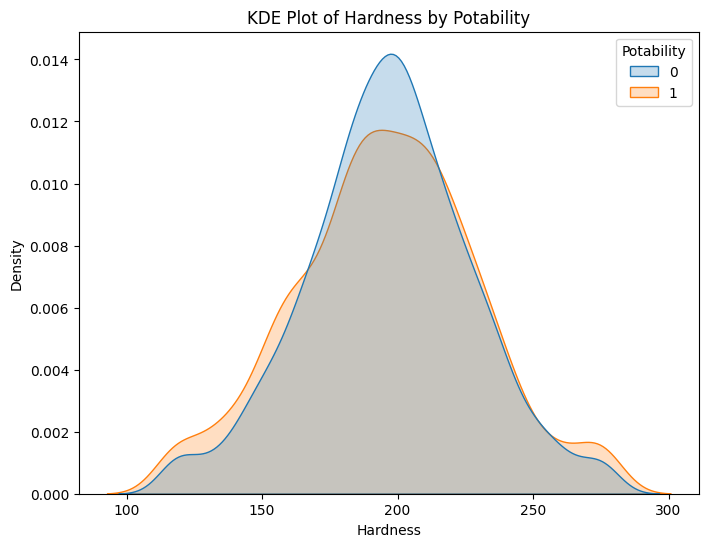

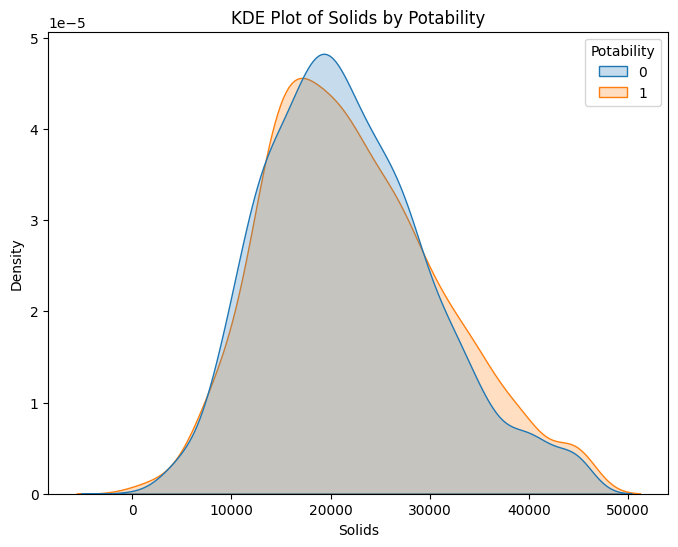

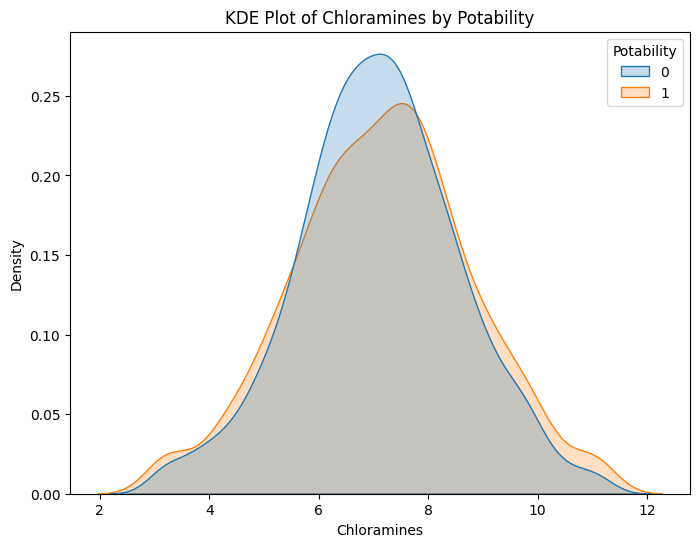

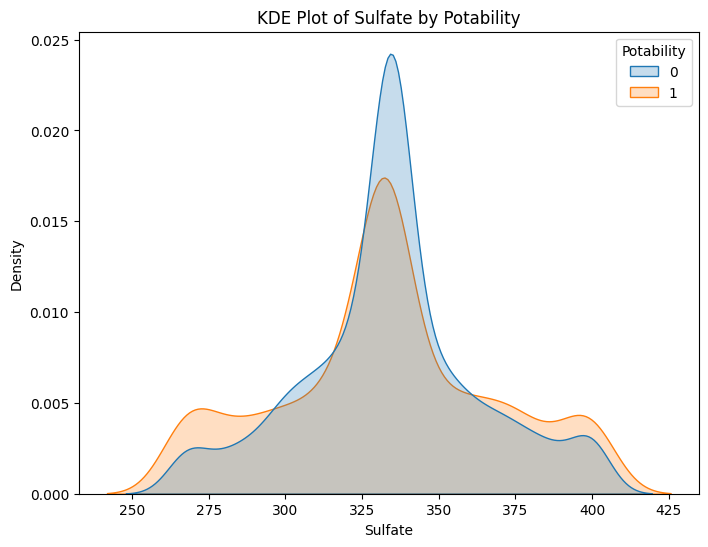

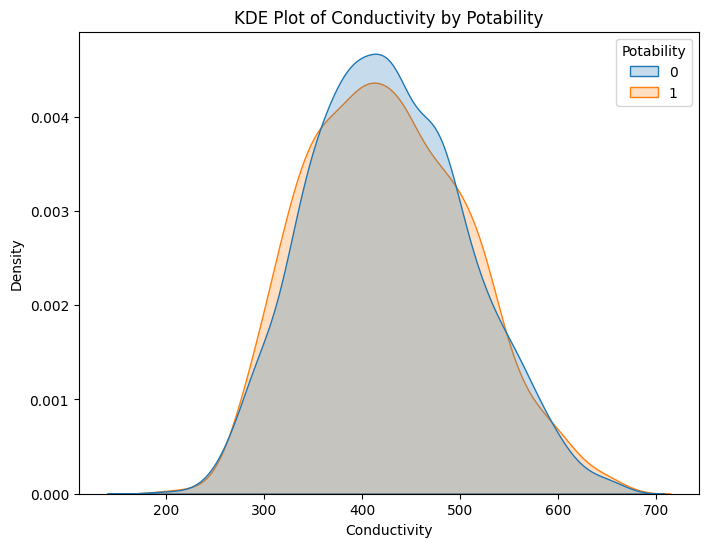

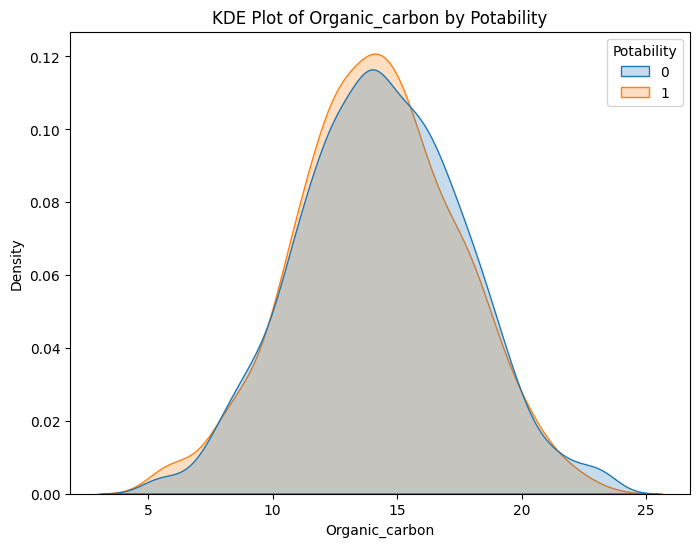

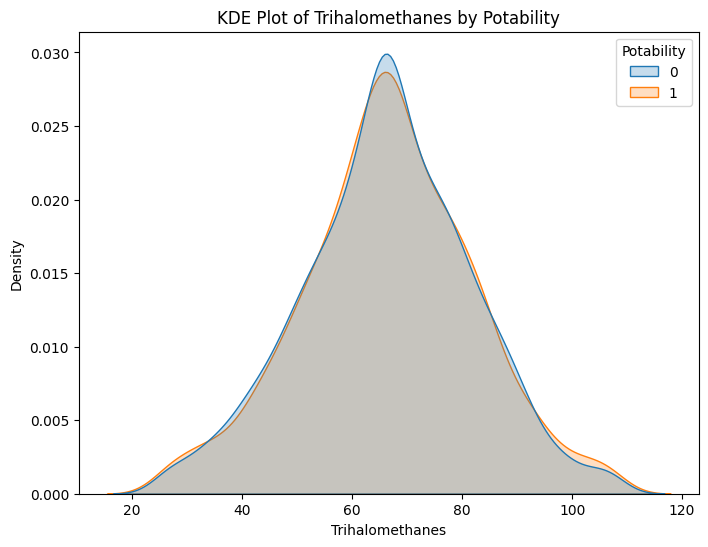

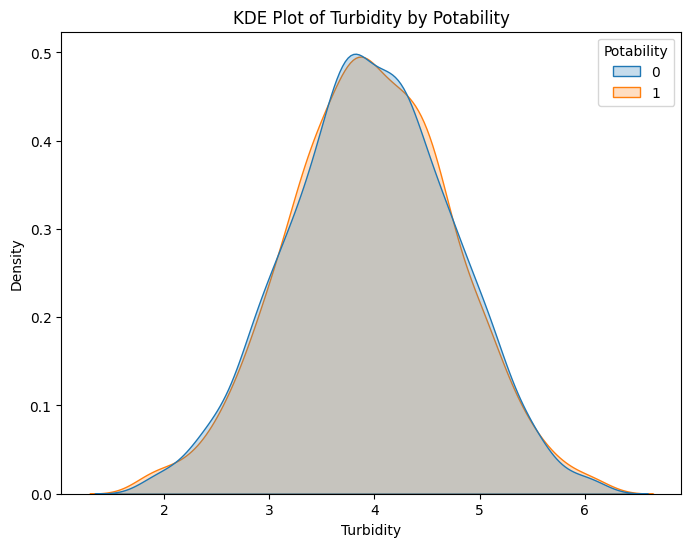

In [172]:
for feature in all_features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=feature, hue='Potability', data=df, fill=True, common_norm=False)
    plt.title(f'KDE Plot of {feature} by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

from this kde plot i can see that all the feature has symmetric patterns for both potatibility 0 and 1.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Potability', axis=1), df['Potability'], test_size=0.2, random_state=42, stratify=df['Potability'])

In [174]:
X_train.shape

(2620, 9)

In [175]:
X_test.shape

(656, 9)

In [176]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

# Pipeline Creation

In [177]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500 ,random_state=42))
])

In [178]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

In [179]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42, probability=True))
])

In [180]:
dt_pipeline = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

In [181]:
rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

In [182]:
gb_pipeline = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

In [183]:
ada_pipeline = Pipeline([
    ('model', AdaBoostClassifier(random_state=42))
])

In [184]:
xgb_pipeline = Pipeline([
    ('model', XGBClassifier(random_state=42))
])

In [185]:
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

In [186]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('knn', knn_pipeline),
        ('svm', svm_pipeline)
        ],
    voting='soft'
)

In [187]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('knn', knn_pipeline),
        ('svm', svm_pipeline)
        ],
    final_estimator=DecisionTreeClassifier(random_state=42)
)

In [188]:
models = {
    'Logistic Regression': lr_pipeline,
    'K-Nearest Neighbors': knn_pipeline,
    'Support Vector Machine': svm_pipeline,
    'Decision Tree': dt_pipeline,
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline,
    'AdaBoost': ada_pipeline,
    'XGBoost': xgb_pipeline,
    'Naive Bayes': nb_pipeline,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}


In [189]:
result = []

for name, model_pipeline in models.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    result.append(
        {
          'Model Name': name,
          'Accuracy': accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': f1
        }
    )

result_df = pd.DataFrame(result).sort_values(by='Accuracy', ascending=False)
result_df

,Model Name,Accuracy,Precision,Recall,F1 Score
4,Random Forest,0.800305,0.810945,0.636719,0.713348
5,Gradient Boosting,0.788110,0.823204,0.582031,0.681922
7,XGBoost,0.775915,0.765854,0.613281,0.681128
3,Decision Tree,0.730183,0.649057,0.671875,0.660269
6,AdaBoost,0.728659,0.767123,0.437500,0.557214
2,Support Vector Machine,0.663110,0.666667,0.273438,0.387812
9,Voting Classifier,0.655488,0.647059,0.257812,0.368715
0,Logistic Regression,0.609756,0.000000,0.000000,0.000000
1,K-Nearest Neighbors,0.606707,0.494048,0.324219,0.391509
8,Naive Bayes,0.606707,0.488372,0.164062,0.245614


In [190]:
best_model_name = result_df.loc[result_df['Accuracy'].idxmax(), 'Model Name']
best_model = models[best_model_name]

best_model

Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])

# Cross-Validation

In [191]:
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean Accuracy: {rf_cv_scores.mean():.4f}")
print(f"Standard Deviation: {rf_cv_scores.std():.4f}")

Random Forest Cross-Validation Scores: [0.79007634 0.78053435 0.79198473 0.78435115 0.77671756]
Mean Accuracy: 0.7847
Standard Deviation: 0.0057


In [192]:
gb_cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Gradient Boosting Cross-Validation Scores: {gb_cv_scores}")
print(f"Mean Accuracy: {gb_cv_scores.mean():.4f}")
print(f"Standard Deviation: {gb_cv_scores.std():.4f}")

Gradient Boosting Cross-Validation Scores: [0.79007634 0.77862595 0.78625954 0.76717557 0.75763359]
Mean Accuracy: 0.7760
Standard Deviation: 0.0120


In [193]:
xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"XGBoost Cross-Validation Scores: {xgb_cv_scores}")
print(f"Mean Accuracy: {xgb_cv_scores.mean():.4f}")
print(f"Standard Deviation: {xgb_cv_scores.std():.4f}")

XGBoost Cross-Validation Scores: [0.77862595 0.76526718 0.77290076 0.79580153 0.76335878]
Mean Accuracy: 0.7752
Standard Deviation: 0.0117


# Random Forest Hyperparameter Tuning

In [194]:
rf_param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

In [195]:
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [196]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [197]:
print(f'Best Parameters for Random Forest: {rf_grid_search.best_params_}')
print(f'Best Score for Random Forest: {rf_grid_search.best_score_}')

Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Best Score for Random Forest: 0.7954198473282442


# Gradient Boosting Hyperparameter Tuning

In [198]:
gb_param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

In [199]:
gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [200]:
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [201]:
print(f"Best Parameters for Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Best Score for Gradient Boosting: {gb_grid_search.best_score_}")

Best Parameters for Gradient Boosting: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best Score for Gradient Boosting: 0.7847328244274809


# XGBoost Hyperparameter Tuning

In [202]:
xgb_param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 0.9, 1.0]
}

In [203]:
xgb_grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [204]:
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      in...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 300, 500],
                         'model__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [205]:
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best Score for XGBoost: {xgb_grid_search.best_score_}")

Best Parameters for XGBoost: {'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.9}
Best Score for XGBoost: 0.7797709923664122


# Best Model Selection

Based on the hyper-parameter tuning result Random Forest Classifier gives the best score with 67.71% accuracy for the Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}


In [206]:
rf_best_model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=500, random_state=42)

rf_best_model.fit(X_train, y_train)
y_pred = rf_best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy for Random Forest: {accuracy}')
print(f'Precision for Random Forest: {precision}')
print(f'Recall for Random Forest: {recall}')
print(f'F1 Score for Random Forest: {f1}')

Accuracy for Random Forest: 0.7987804878048781
Precision for Random Forest: 0.81
Recall for Random Forest: 0.6328125
F1 Score for Random Forest: 0.7105263157894737


Confusion Matrix for Random Forest:
[[362  38]
 [ 94 162]]


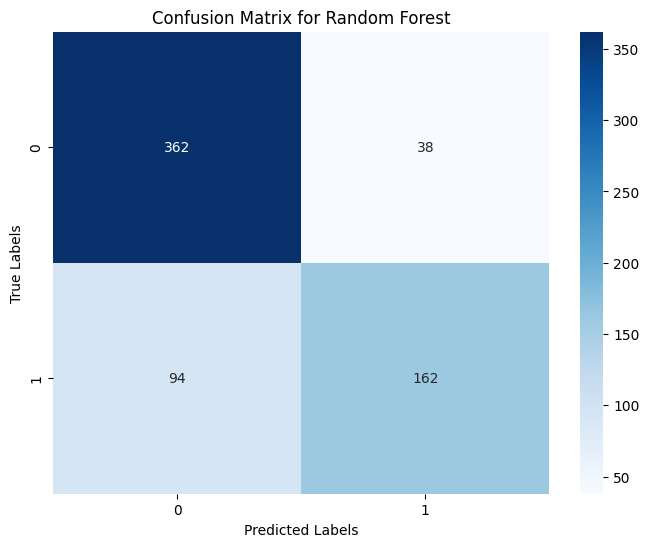

In [207]:
print(f"Confusion Matrix for Random Forest:\n{confusion_matrix(y_test, y_pred)}")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [208]:
print(f'Classification Report for Random Forest:\n{classification_report(y_test, y_pred)}')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       400
           1       0.81      0.63      0.71       256

    accuracy                           0.80       656
   macro avg       0.80      0.77      0.78       656
weighted avg       0.80      0.80      0.79       656



In [213]:
import pickle

In [214]:
with open('water_potability_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_best_model, file)

In [215]:
with open('/content/water_potability_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [216]:
loaded_model.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,